In [1]:
import numpy as np
from typing import Tuple
from torch import Tensor
from torchaudio import load
import matplotlib.pyplot as plt
from IPython.display import Audio
import torchaudio.functional as F
from helpers.path_utils import get_base_dir
from helpers.plot import plot_wavelet_spectrogram

In [3]:
def generate_synthetic_wave(frequency: int, secs_duration: int) -> Audio:
    sample_rate = 44100
    t = np.linspace(0, secs_duration, int(sample_rate * secs_duration), endpoint=False)
    wave = 0.5 * np.sin(2 * np.pi * frequency * t)
    return Tensor(wave), sample_rate

def get_positive_freq_and_magn(audio: np.array, sample_rate: int) -> Tuple[np.array, np.array]:
    fft_result = np.fft.fft(audio)
    fft_magnitude = np.abs(fft_result)
    frequencies = np.fft.fftfreq(len(fft_result), 1/sample_rate)
    
    # Filtrar solo las frecuencias positivas
    positive_frequencies = frequencies[frequencies >= 0]
    positive_fft_magnitude = fft_magnitude[:len(positive_frequencies)]

    return positive_frequencies, positive_fft_magnitude

def apply_bandpass_filter(waveform, sample_rate, low_freq, high_freq):
    central_freq = (low_freq + high_freq) / 2
    bandwidth = high_freq - low_freq
    Q = central_freq / bandwidth

    filtered_waveform = F.bandpass_biquad(waveform, sample_rate, central_freq, Q)
    return filtered_waveform

def plot_audio_fft(positive_frequencies: np.array, positive_fft_magnitude: np.array) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(positive_frequencies, positive_fft_magnitude)
    plt.title('Distribución de Frecuencias')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.grid()
    plt.show()

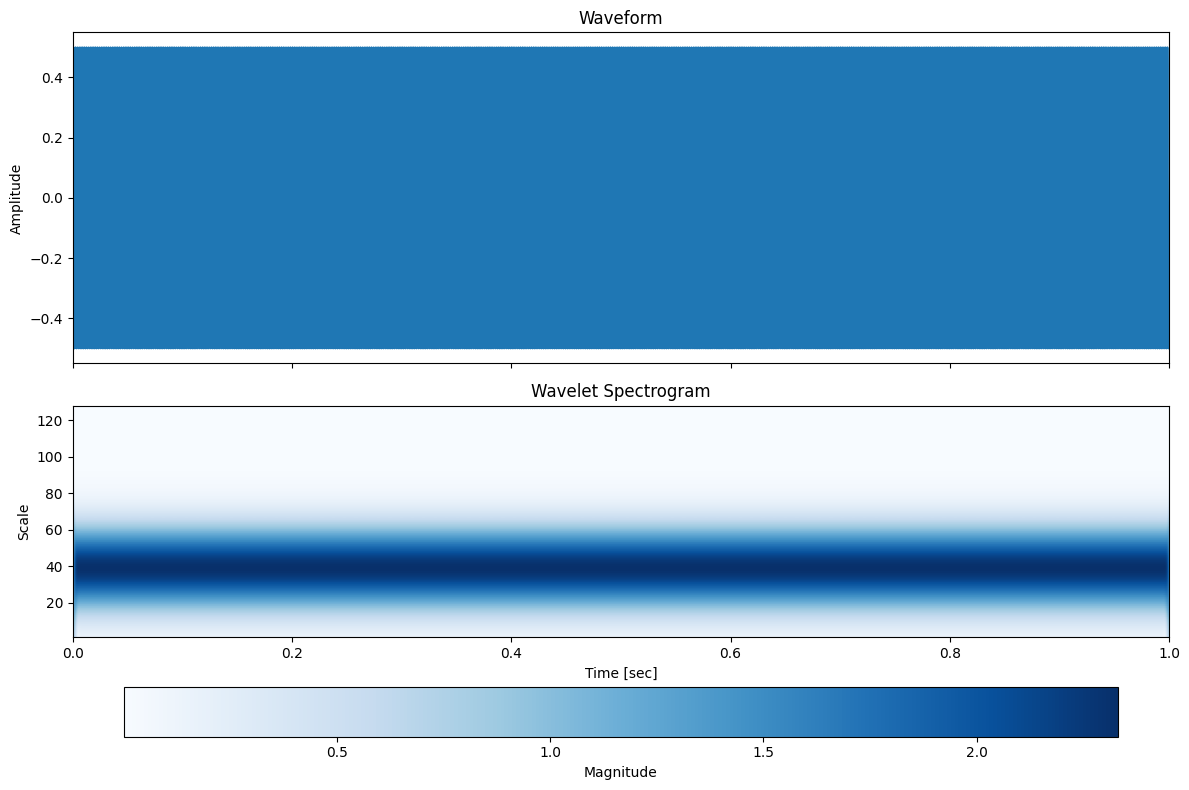

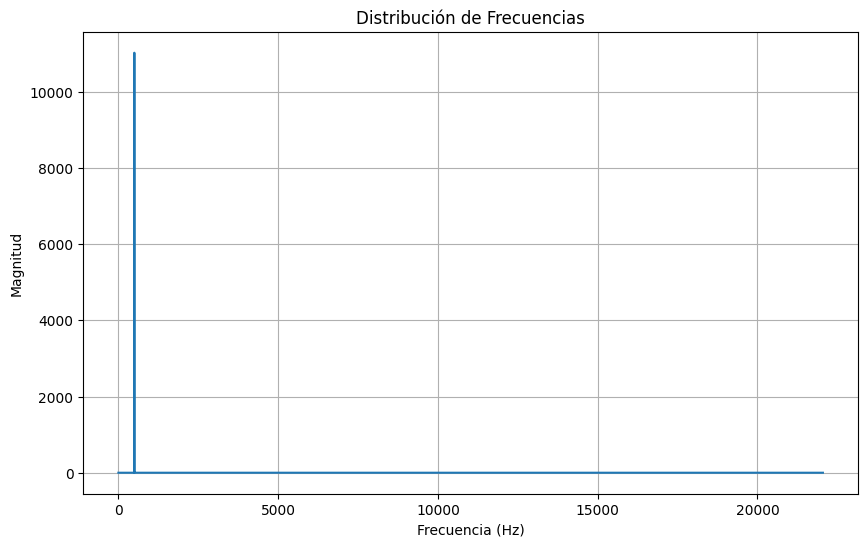

In [4]:
synthetic_audio, synthetic_sr = generate_synthetic_wave(frequency=500, secs_duration=1)
synth_freq, synth_magn = get_positive_freq_and_magn(synthetic_audio, synthetic_sr)


plot_wavelet_spectrogram(synthetic_audio, synthetic_sr, downsample_factor=1)
plot_audio_fft(synth_freq, synth_magn)

Audio(synthetic_audio, rate=synthetic_sr, autoplay=True)

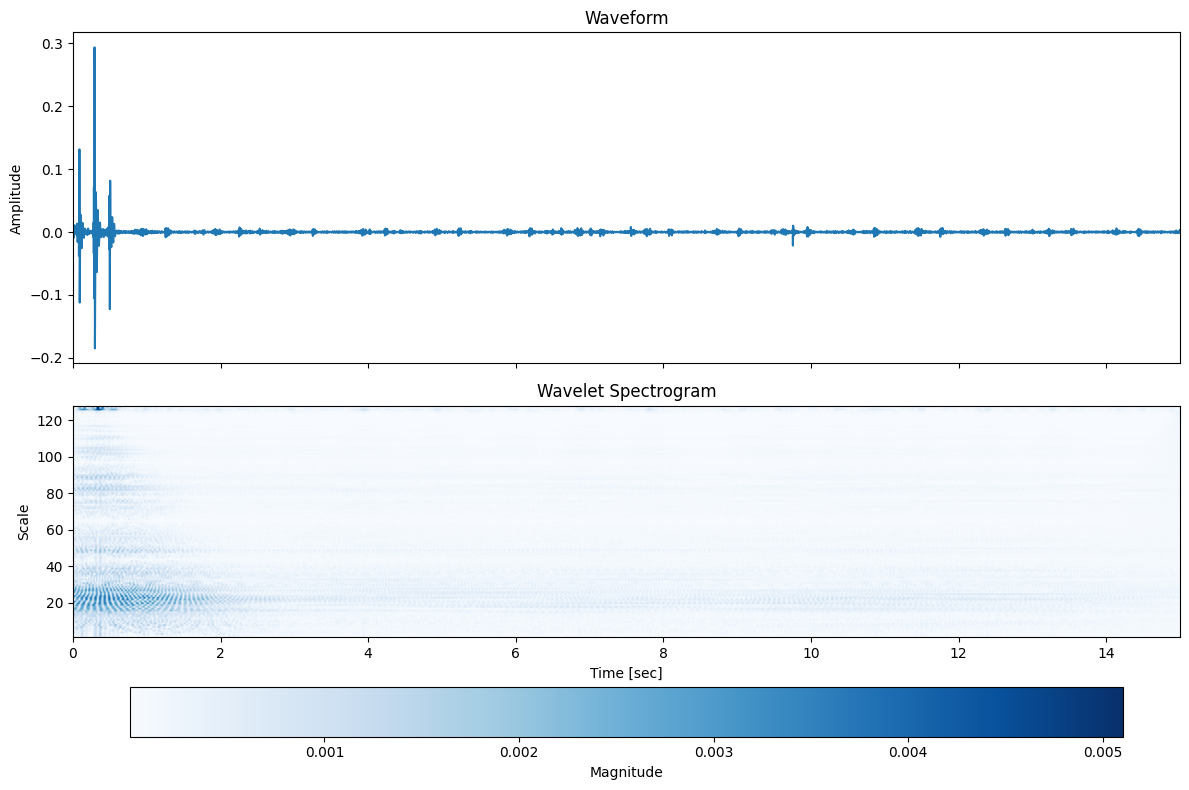

In [63]:
AUDIO_DIR = get_base_dir().joinpath("data/mobile/test-202405232229.m4a")
AUDIO_DIR = get_base_dir().joinpath("data/digital/test-202405191318.wav")
audio, sample_rate = load(AUDIO_DIR)

plot_wavelet_spectrogram(audio, sample_rate)
Audio(audio, rate=sample_rate, autoplay=True)

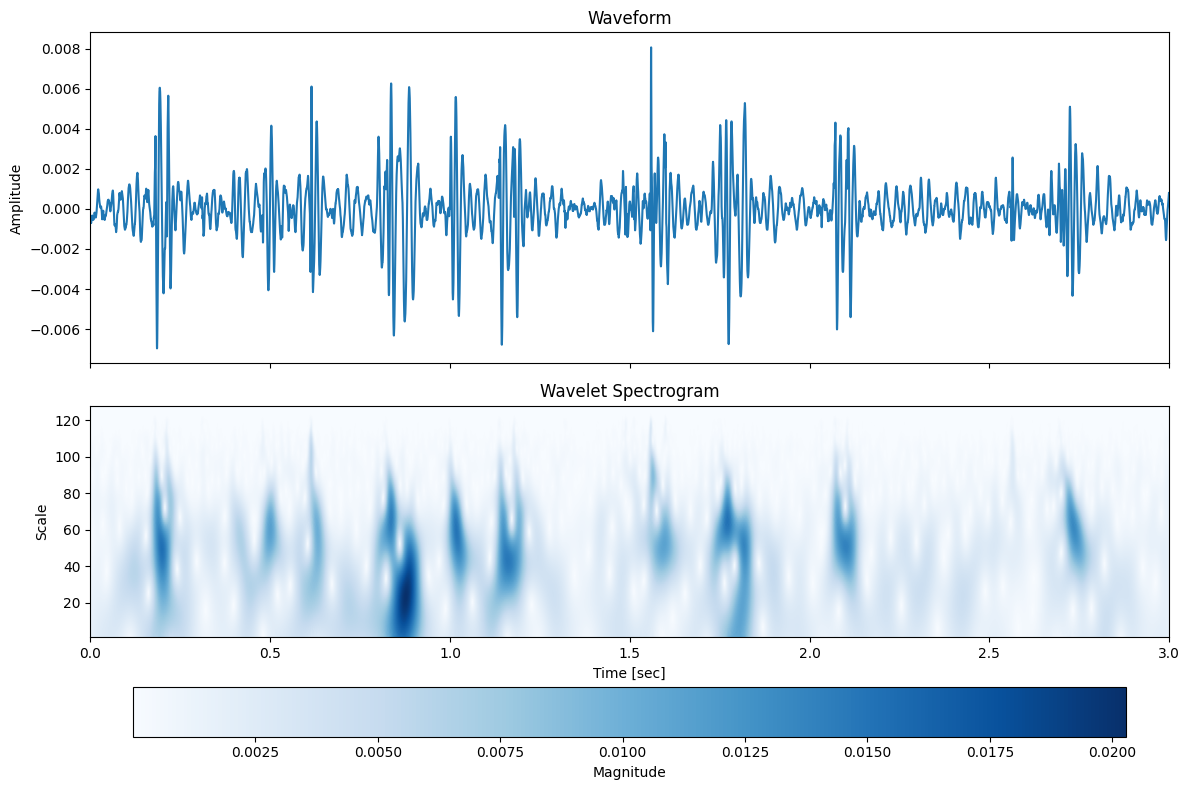

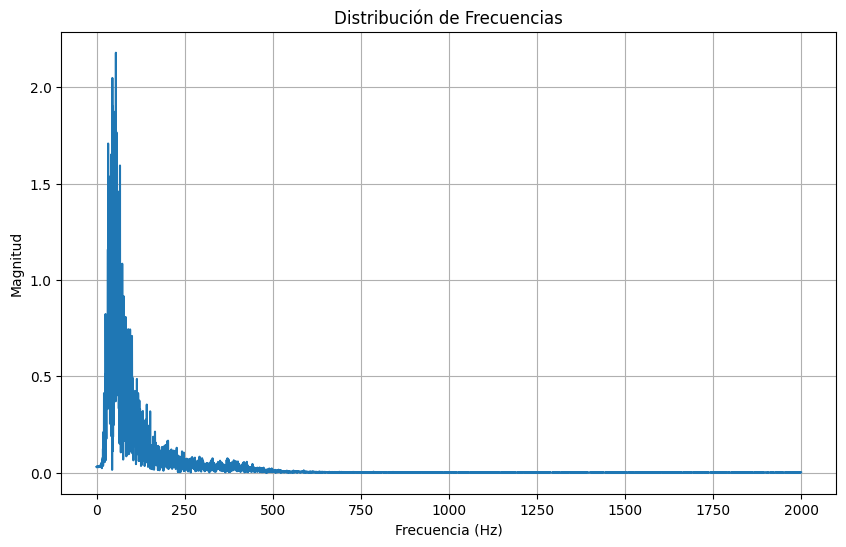

In [64]:
BEGIN_AT = 6*sample_rate
END_AT = 9*sample_rate

audio_sample = audio[:, BEGIN_AT:END_AT].clone()
sample_freq, sample_magn = get_positive_freq_and_magn(audio_sample.squeeze(), sample_rate)

plot_wavelet_spectrogram(audio_sample, sample_rate, downsample_factor=1)
plot_audio_fft(sample_freq, sample_magn)

Audio(audio_sample, rate=sample_rate, autoplay=True)

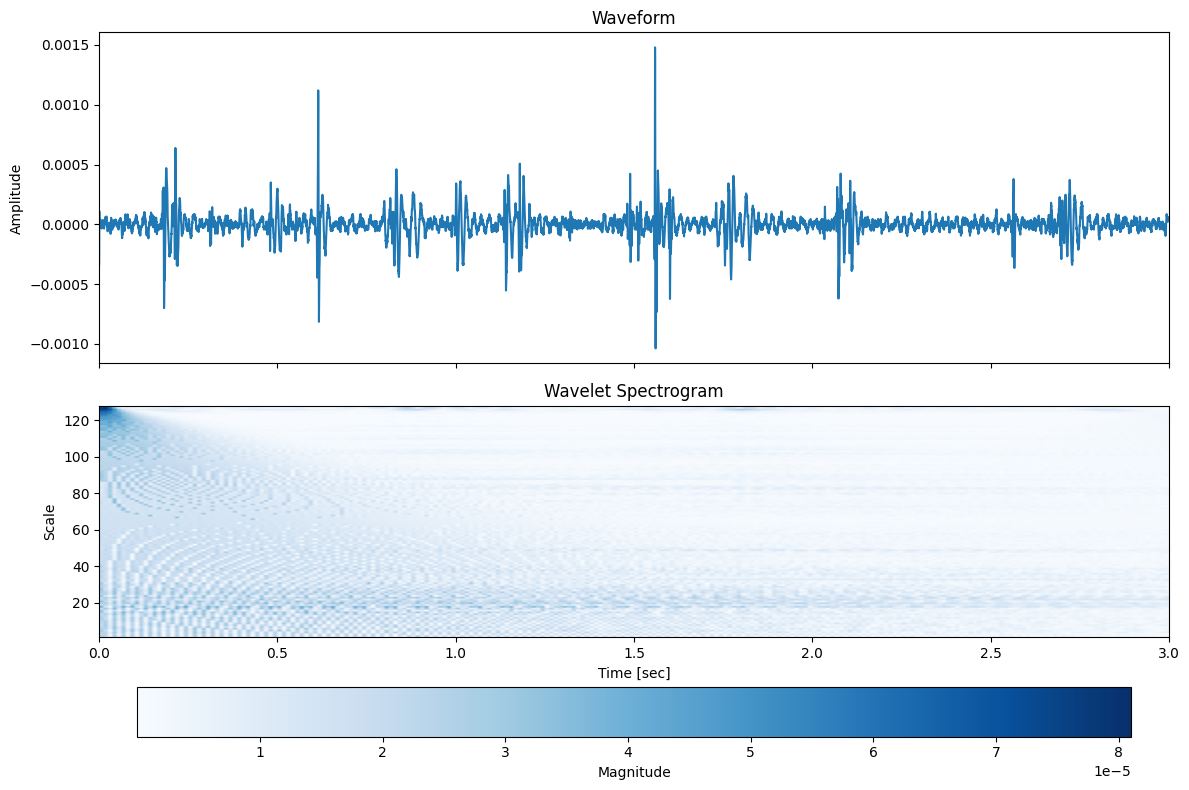

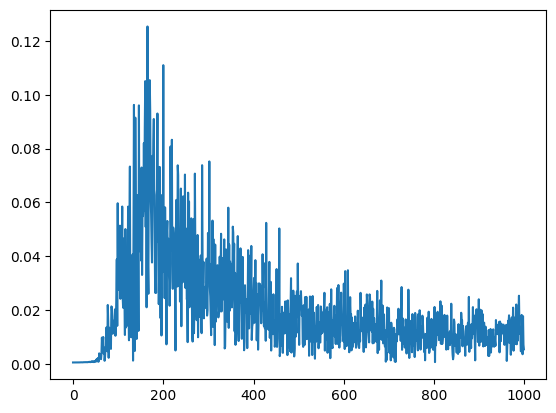

In [65]:
low_cutoff = 0
high_cutoff = 2500
filtered_audio = apply_bandpass_filter(audio_sample, sample_rate, low_cutoff, high_cutoff)

filtered_freq, filtered_magn = get_positive_freq_and_magn(filtered_audio.squeeze(), sample_rate)

plot_wavelet_spectrogram(filtered_audio, sample_rate)
plt.plot(filtered_magn[:1000])
Audio(filtered_audio, rate=sample_rate, autoplay=True)